In [273]:
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
import pandas as pd
import numpy as np

In [275]:
data=pd.read_csv("E:\Python\PracticleData\examdata.txt",names=['exam1','exam2','admitted'])

In [1]:
data.head()

In [2]:
data.describe()

In [5]:
#no need ::::::data=(data-data.mean())/data.std()

In [279]:
positive=data[data['admitted'].isin([1])]
negative=data[data['admitted'].isin([0])]

Text(0, 0.5, 'Exam2 score')

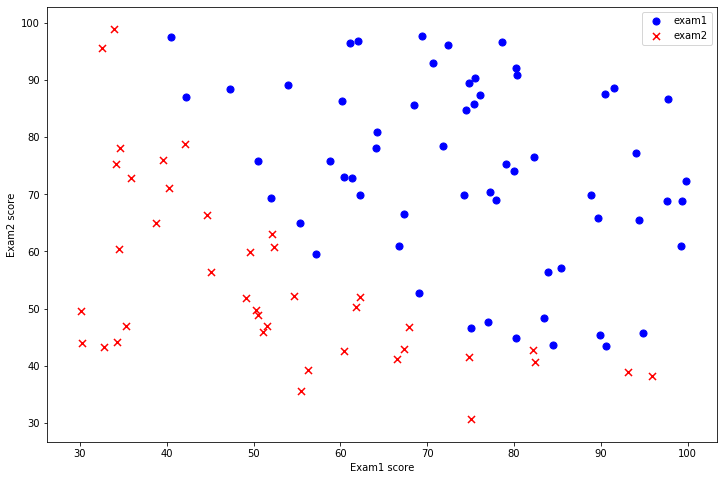

In [280]:
#data.plot(kind='scatter',x=positive,y=negative,figsize=(12,8))
fig,ax = plt.subplots(figsize=(12,8))                          
#x=data['exam1']
#y=data[
#ax.plot(x,'r')  
#ax.plot(y,'b') 
ax.scatter(positive['exam1'],positive['exam2'],c='b',marker='o',s=50,label='exam1')  
ax.scatter(negative['exam1'],negative['exam2'],c='r',marker='x',s=50,label='exam2')
ax.legend()
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')

In [281]:
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [282]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [283]:
def computeCost(X,y,theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y) 
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)
    

In [284]:
data.insert(0,'ones',1)
X=data.iloc[:,0:3]
y=data.iloc[:,3:4]


In [285]:
data.head()

,ones,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [286]:
theta=np.zeros((1,3))
type(X),type(y),type(theta)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame, numpy.ndarray)

In [287]:
np.shape(X),np.shape(y),np.shape(theta),theta

((100, 3), (100, 1), (1, 3), array([[0., 0., 0.]]))

In [288]:
c=computeCost(X,y,theta)

In [289]:
c

0.6931471805599453

In [290]:
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(theta)

In [291]:
def gradientDescent(X,y,theta,alpha, iterations):
    temp = np.matrix(np.zeros((1,3)))
    parameters = 3  #theta0,theta1,theta2
    cost = np.zeros(iterations) #error of every iteration
    for i in range(iterations):
        error = sigmoid(X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j] - (alpha* np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta) 
    return theta,cost

In [292]:
a,b=gradientDescent(X,y,theta,0.00001,1000000)

In [293]:
b[-1]    #########0.22465416189188267

0.22465416189188267

In [294]:
a        ########[-15.39517866,   0.12825989,   0.12247929]

matrix([[-15.39517866,   0.12825989,   0.12247929]])

In [295]:
h=sigmoid(X*a.T)

In [3]:
#h[0:10]

In [297]:
for i in range(len(h)):
    if h[i]>0.5:
        h[i]=1
    else:
        h[i]=0

In [4]:
#h[0:10,:]   #printing only first 10 rows

In [299]:
count=0
for i in range(len(y)):
    if y[i]==h[i]:
        count+=1

In [300]:
count

89

In [301]:
accuracy=(count*100)/len(X)

In [302]:
accuracy

89.0

In [304]:
l1=[]
l2=[]
x1=np.linspace(data.exam1.min(),data.exam1.max(),500)
x2=np.linspace(data.exam2.min(),data.exam2.max(),500)
for i in x1:
    for j in x2:
        d = sigmoid(a[0,0]+a[0,1]*i+a[0,2]*j)
        if d>0.49 and d< 0.51:
            l1.append(i)
            l2.append(j)
                


Text(0, 0.5, 'Exam2 score')

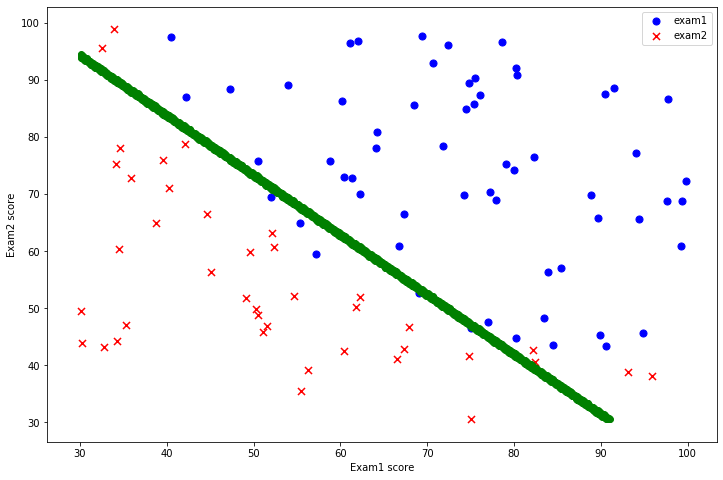

In [305]:
fig,ax = plt.subplots(figsize=(12,8))                          
ax.scatter(positive['exam1'],positive['exam2'],c='b',marker='o',s=50,label='exam1')  
ax.scatter(negative['exam1'],negative['exam2'],c='r',marker='x',s=50,label='exam2')
ax.legend()
ax.scatter(l1,l2,c='g')
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')